# Gaussian Process Regression

By Christopher J. Moore & Zoheyr Doctor

Prepared for two 1.5 hours practical sessions held at the "Workshop on Reduced Order Gravitational-Wave Modeling" at the Max Planck Institute for Gravitational Physics, Potsdam from $18^{\textrm{th}}-22^{\textrm{nd}}$ of June, $2018$.


In [2]:
import numpy as np
print ( "numpy version" , np.__version__ )

import scipy
print ( "scipy version" , scipy.__version__ )

import matplotlib
from matplotlib import pyplot as plt
print ( "matplotlib version" , matplotlib.__version__ )


numpy version 1.14.2
scipy version 0.19.1
matplotlib version 2.1.0


# Useful References

[RW] - The textbook "Gaussian Processes for Machine Learning", by Carl Edward Rasmussen and Christopher K. I. Williams, MIT Press, 2006.

ZOHEYR, IS THERE ANYTHING ELSE YOU WANT TO ADD HERE?


# Table of Contents

ZOHEYR, THIS IS JUST A SUGGESTION FOR THE MOMENT, PLEASE FEEL FREE TO MODIFY THE STRUCTURE.

1 Introduction

2 What is a Gaussian Processes?

3 The Covariance Function

4 Using Gaussian Processes for Regression

5 Gaussian Process Regression: A More Sophisticated Gravitational Wave Example

6 Conclusions


# 1 Introduction

INTRODUCTION GOES HERE

This Jupyter notebook has been prepared to run with python 3, and requires only numpy (tested with version 1.14.2), scipy (tested with version 0.19.1) and matplotlib (tested with version 2.1.0) to run.


# 2 What is a Gaussian Process?

A Gaussian Process may be regarded as an infinite dimensional generalisation of the more familiar concept of a finite dimensional Gaussian random variable. Therefore we begin by recapping finite dimensional Gaussian (or "normal") random variables.


# 2.1 Gaussian, or "Normal", Random Variables

A continuous random variable $z\in\mathbb{R}$ is said to be Gaussian distributed if its probability density function (PDF) is given by

$$ P(z)\,\textrm{d}z = \frac{\exp\left(\frac{-1}{2}\left(\frac{z-\mu}{\sigma}\right)^{2}\right)}{\sqrt{2\pi\sigma^{2}}} \,\textrm{d}z \,, \hspace{1cm}\textrm{(2.1)} $$

where $\mu$ is the "mean" and $\sigma^{2}$ is the "variance";

$$\textrm{E}\left[ z \right] \equiv \int\textrm{d}z\,P(z)\,z = \mu \,, $$
$$\textrm{E}\left[ \left(z-\mu\right)^{2} \right] \equiv \int\textrm{d}z\,P(z)\left(z-\mu\right)^{2} = \sigma^{2} \,.$$

The variance must always be non-negative; i.e. $\sigma^{2}\geq 0$.
Eq.(1.1) is clumbersome to write, so the following shorthand is usually adopted,

$$ z \sim \mathcal{N}(\mu,\sigma)\,. $$

$$\phantom{.}$$

A continuous random $N$-vector $\mathbf{z}^{\textrm{T}}=(z_{1},z_{2},\ldots,z_{N})\in\mathbb{R}^{N}$ is said to be Gaussian distributed if its probability density function (PDF) is given by

$$ P(\mathbf{z})\,\textrm{d}\mathbf{z} = \frac{\exp\left(\frac{-1}{2}(\mathbf{z}-\mathbf{\mu})^{\textrm{T}}\cdot\mathbf{K}^{-1}\cdot (\mathbf{z}-\mathbf{\mu})\right)}{\sqrt{(2\pi)^{N}\left|\mathbf{K}\right|}} \,\textrm{d}\mathbf{z} \,, \hspace{1cm}\textrm{(2.2)} $$

where $\mathbf{\mu}$ is the "mean" $N$-vector and $\mathbf{K}$ is the $N\times N$ "covariance" matrix;

$$\textrm{E}\left[ \mathbf{z} \right] \equiv \int\textrm{d}\mathbf{z}\,P(\mathbf{z})\mathbf{z} = \mathbf{\mu} \,, $$
$$\textrm{E}\left[ \left(\mathbf{z}-\mathbf{\mu}\right)\left(\mathbf{z}-\mathbf{\mu}\right)^{\textrm{T}} \right] \equiv \int\textrm{d}\mathbf{z}\,P(\mathbf{z})\left(\mathbf{z}-\mathbf{\mu}\right)\left(\mathbf{z}-\mathbf{\mu}\right)^{\textrm{T}} = \mathbf{K} \,. $$

The covariance matrix must always be symmetric (i.e. $\mathbf{K}=\mathbf{K}^{\textrm{T}}$) and positive semi-definite.

$\textbf{Definition: }$ A real $N\times N$ matrix $\mathbf{K}$ is positive semi-definite if $\mathbf{u}^{\textrm{T}}\cdot\mathbf{K}\cdot\mathbf{u}\geq 0$ for any $N$-vector $\mathbf{u}\in\mathbb{R}^{N}$.
If $\mathbf{u}^{\textrm{T}}\cdot\mathbf{K}\cdot\mathbf{u} = 0 \Rightarrow \mathbf{u}=\mathbf{0}$ then $\mathbf{K}$ is said to be strictly positive definite.

$\textbf{Exercise: }$ Show that a symmetric matrix is positive semi-definite if and only if all of its eigenvalues are non-negative.

Eq.(1.2) is clumbersome to write, so the following shorthand is usually adopted,

$$ \mathbf{z} \sim \mathcal{N}(\mathbf{\mu},\mathbf{K})\,. $$

$$\phantom{.}$$

We will assume the reader is familiar with most of the properties of multivariate Gaussian distributions. However, we will point out that a Gaussian distribution is fully specified by just the mean $\mathbf{\mu}$ and the pairwise covariance matrix $\mathbf{K}$ (all the higher order moments, e.g. $\textrm{E}\big[z_{1}\times z_{2} \times z_{3}\big]$, may be expressed in terms of just $\mathbf{\mu}$ and $\mathbf{K}$). We also poinrt our the "affine" property of Gaussian random variables which will be relevant in what follows; if $\mathbf{z} \sim \mathcal{N}(\mathbf{\mu},\mathbf{K})$ then for any $M$-vector $\mathbf{a}$ and $M\times N$ matrix $b$, the vector $\mathbf{y}=\mathbf{a}+\mathbf{b}\cdot\mathbf{z}$ is also a Gaussian random variable, $\mathbf{y}\sim\mathcal{N}(\mathbf{a}+\mathbf{b}\cdot\mathbf{\mu},\mathbf{b}\cdot\mathbf{K}\cdot\mathbf{b}^{\textrm{T}})$. In particular, this implies that any subset of the components of $\mathbf{z}$ is a Gaussian random variable and the covariance matrix is given by the relevant subset of the components of $\mathbf{K}$.

$$\phantom{.}$$

It is easy to verify that the random $N$-vector $\mathbf{z}'=\mathbf{z}-\mathbf{\mu}$ is distributed as $\mathbf{z}' \sim \mathcal{N}(\mathbf{0},\mathbf{\Sigma})$. For this reason we will usually (without loss of generality) choose to work with zero-mean Gaussian random variables.

$$\phantom{.}$$

Gaussian random variables are well suppported in any sensible programming language; e.g. python$\ldots$


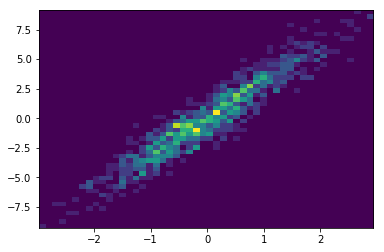

In [5]:
# A mean 2-vector and a 2 by 2 covariance matrix
mu = np.array ( [ 0 , 0 ] )
K = np.array ( [ [ 1 , 3 ] , [ 3 , 10 ] ] )

# Draw 1000 realisations of the Gaussian random variable z~N(mu,K)
dist = np.array ( [ np.random.multivariate_normal ( mu , K ) for i in range ( 1000 ) ] )

# Plot the distribution of z
plt.hist2d ( dist[:,0] , dist[:,1] , bins=50 )
plt.show ( )


# 2.2 Gaussian Processes

Instead of distributions over a finite number of random variables (i.e. a random vector) we now wish to consider distributions smooth random functions. For some set $\mathcal{S}$ we will consider real valued functions $\,f:\mathcal{S}\rightarrow\mathbb{R}$. The random variables will be the values of the function evaluated at particular inputs; i.e. $f(x)$ for $x\in\mathcal{S}$.

We will use the following definition of a Gaussian process (GP).

$\textbf{Definition }$ For any set $\mathcal{S}$, a GP on $\mathcal{S}$ is a collection of random variables $\{{f(x):x\in \mathcal{S}\}}$ such that for any finite ${n\in\mathbb{N}}$, and any ${x_{1},x_{2},\ldots,x_{n}\in\mathcal{S}}$, the vector ${\left(f(x_{1}),f(x_{2}),\ldots,f(x_{n})\right)\in\mathbb{R}^{n}}$ is distributed as a multivariate Gaussian.

Notice that in this definition the set $\mathcal{S}$ can be either finite and infinite dimensional. However, the finite case is of little interest as this definition simply reduces to the familiar multivariate Gaussian distribution.

$$\phantom{.}$$

$\textbf{An Example of a GP: }$ For this audience perhaps the most familiar example of a Gaussian process is the noise in a gravitational wave interferometer. 
The noise is a real valued function of time. 
The noise is usually assumed to be stationary and Gaussian, meaning that in the frequency domain $\textrm{E}\left[ {\widetilde{n}} (f) {\widetilde{n}} (f')^{*}\right]=\frac{1}{2}S_{n}(f)\delta(f-f')$. 
From the definition of the Fourier transform, it follows that in the time domain $\textrm{E}\left[n(t)n(t')\right]=\int_{0}^{\infty}S_{n}(f)\cos\left(2\pi f(t-t')\right) \equiv \kappa(t-t')$. 
We are using theA Fourier transform conventions of [arXiv:1408.0740]. The function $S_{n}(f)$ is the detector's one-sided noise power spectral density (usually given in units of $\textrm{Hz}^{-1}$).
Comparing with our above definition we see that in this case $\mathcal{S}=\mathbb{R}$, $x=t$, and $z(x)=n(t)$. 
The vector of noise values at any finite number of times, $\mathbf{n}\equiv\left(n(t_{1}),n(t_{2}),\ldots,n(t_{N})\right)$, is distributed as $\mathbf{n}\sim\mathcal{N}(\mathbf{0},\mathbf{K})$, where

$$\mathbf{K} = \begin{pmatrix} \kappa(t_{1}-t_{1}) & \kappa(t_{1}-t_{2}) & \ldots & \kappa(t_{1}-t_{N}) \\ \kappa(t_{2}-t_{1}) & \kappa(t_{2}-t_{2}) & \ldots & \kappa(t_{2}-t_{N}) \\ \vdots & \vdots & \ddots & \vdots \\ \kappa(t_{N}-t_{1}) & \kappa(t_{N}-t_{2}) & \ldots & \kappa(t_{N}-t_{N})  \end{pmatrix}\,.$$

$$\phantom{.}$$

We may easily construct new GPs with any properties we desire by specifying the desired mean ($\mu(x)=\textrm{E}\big[f(x)\big]$) and pairwise covariance ($k(x,x')=\textrm{E}\Big[\big(f(x)-\mu(x)\big)\big(f(x')-\mu(x')\big)\Big]$). We are free to choose any mean function, $\mu:\mathcal{S}\rightarrow\mathbb{R}$; just as with Gaussian distributions, we will usually work with zero-mean GPs, $\mu(x)=0$ for all $x\in\mathcal{S}$. We are also free to choose any "covariance function", $k:\mathcal{S}\times\mathcal{S}\rightarrow\mathbb{R}$, subject to some constraints. Extending the notation in Eqs. 1.1 and 1.2, if a function $f(x)$ is drawn from a GP with mean function $\mu(x)$ and covariance function $k(x,x')$ then we write

$$f(x) \sim \mathcal{GP}( \, \mu(x) \, , \, k(x,x') \, ) \hspace{3cm} \textrm{(2.3)}$$

Following out definition of a GP, we may consider any finite set of points $\mathbf{x}_{*}^{\textrm{T}} = (x_{1},x_{2},\ldots,x_{N})$ and the $N$-vector $\mathbf{f}_{*}^{\textrm{T}}=\left(f(x_{1}),f(x_{2}),\ldots,f(x_{N})\right)$ must distributed as $\mathbf{f}_{*} \sim \mathcal{N}( \mathbf{M} , \mathbf{K} )$, where

$$ \begin{align} 
&\mathbf{M}^{\textrm{T}} = \big( \, \mu(x_{1}) \, , \, \mu(x_{2}) \, , \ldots , \, \mu(x_{N}) \, \big) \,, \hspace{2cm} &\textrm{(2.4)} \\
\textrm{and } \; &\mathbf{K} =  \begin{pmatrix} k(x_{1},x_{1}) & k(x_{1},x_{2}) & \ldots & k(x_{1},x_{N}) \\ k(x_{2},x_{1}) & k(x_{2},x_{2}) & \ldots & k(x_{2},x_{N}) \\ \vdots & \vdots & \ddots & \vdots \\ k(x_{N},x_{1}) & k(x_{N},x_{2}) & \ldots & k(x_{N},x_{N})  \end{pmatrix} \,. \hspace{2cm} &\textrm{(2.5)}
\end{align} $$

If equation (2.3) is to correctly describe a good GP, then the matrix $\mathbf{K}$ formed in equation (2.5) must always be a valid be symmetric positive semi-definite covariance matrix. Therefore the covariance function $k(x,x')$ must be a symmetric function (i.e. $k(x,x')=k(x',x)$) and a "positive semi-definite function".

$\textbf{Definition: }$ A covariance function $k:\mathcal{S}\times\mathcal{S}\rightarrow\mathbb{R}$ is positive semi-definite if the $N\times N$ matrix \textrm{$K_{ij}=k(x_{i},x_{j})$ is positive semi-definite for all sets of points $x_{1},x_{2},\ldots,x_{n}\in\mathcal{S}$ for any $N\in\mathbb{N}$.

$$\phantom{.}$$

Notice that in equation (2.3) we have specified the pairwise covariances between any subset of the random variables. The affine property of Gaussian distributions ensures that this will never lead to contradiction. If $(f(x_1),f(x_2))\sim\mathcal{N}\big(\left[0,0\right],\left[\left[k(x_1,x_1),k(x_1,x_2)\right],\left[k(x_2,x_1),k(x_2,x_2)\right]\right]\big)$ then $f(x_1)\sim\mathcal{N}\big(0,k(x_1,x_1)\big)$, as required.


# 2.3 Some Examples of Gaussian Processes

# 2.3.1 Straight Line

Consider the Gaussian process on the real line ($\mathcal{S}=\mathbb{R}$) with $\mu(x) = 0$ and $k_{\textrm{line}}(x,x')=xx'$.

To show that this is indeed a valid GP we need to show that $k_{\textrm{line}}(x,x')$ is a symmetric positive semi-definite covariance function. It is obviously symmetric, but the positive definite property requires a proof. 
This can be proved by considering the eigenvalues of the covariance matrix formed by acting $k$ on any finite set of points $\mathbf{x}=(x_{1},x_{2},\ldots,x_{n})$; the covariance matrix is $\mathbf{K}=\mathbf{x}\otimes\mathbf{x}^{\textrm{T}}$. 
This matrix has one eigenvalue $\lambda=\left|\mathbf{x}\right|^{2} \geq 0$ corresponding to the eigenvector $\mathbf{x}$, and all of the remaining eigenvectors vanish.
Because all of the eigenvalues are non-negative for any choice of points $\mathbf{x}$, and for any $n\in\mathbb{N}$, the covariance function $k_{\textrm{line}}(x,x')$ is positive semi-definite.

We will now plot a realisation of this GP. The code in the following cell defines $\mu(x)$, $k_{\textrm{line}}(x,x')$, and the vector $\mathbf{x}_{*}$ which is chosen to be a densely sampled vector of points in the range $0\leq x < 10$. Try running the following cell several times to get a sense of the behaviour of this GP.


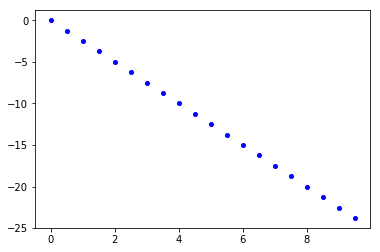

In [29]:
# Straight Line

# The mean function of the GP
def mu ( x ):
    return 0

# The covariance function of the GP
def k_line ( x , y ):
    return x * y

# The sampling points
x_star = np.arange ( 0 , 10 , 0.5 )

# The mean N-vector - formed from the mean function, mu
M = np.array ( [ mu(x) for x in x_star ] )

# The N by N covariance matrix - formed from the covariance function, k.
K = np.array( [ [ k_line(x,y) for x in x_star ] for y in x_star ] )

# A random realisation of the function values - drawn from the multivariate Gaussian distribution ~ N(M,K)
f_star = np.random.multivariate_normal ( M , K )

# Plot a realisation of the GP
plt.plot ( x_star , f_star , 'bo' , markersize=4 )
plt.show ( )

$\textbf{Exercise:}$ If you were to run the above cell many times and record the gradients of lines obtained, what would distribution would the gradients follow? 


# 2.3.2 Brownian Motion

Consider the Gaussian process on the positive real line ($\mathcal{S}=\mathbb{R}_{+}$) with $\mu(x) = 0$ and $k_{\textrm{Brownian}}(x,x')=\textrm{min}(x,x')$.

To show that this is a valid GP we need to show that $k_{\textrm{Brownian}}(x,x')$ is a symmetric positive semi-definite covariance function. As was the case in the previous example 2.3.1 the symmetry property is obvious, but the positive semi-definite property requires proof. 

$\textbf{Exercise:}$ Show that $k_{\textrm{Brownian}}(x,x')$ is a positive semi-definite function. 

$\textbf{Hint: }$ Let $H(t;x)=\begin{cases}1\quad\textrm{if }t\leq x\\0\quad\textrm{else}\end{cases}\,,$ and write the $\textrm{min}$ function as $\textrm{min}(x_{i},x_{j})=\int_{0}^{\infty}\textrm{d}t\;H(t;x_{i})H(t;x_{j})\,.$ 

We will now plot a realisation of this GP. The code in the following cell defines $\mu(x)$, $k_{\textrm{line}}(x,x')$, and the vector $\mathbf{x}_{*}$ which is chosen to be a densely sampled vector of points in the range $0\leq x < 10$. Try running the following cell several times to get a sense of the behaviour of this GP.


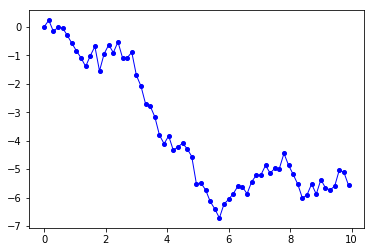

In [30]:
# Brownian Motion

# The mean function of the GP
def mu ( x ):
    return 0

# The covariance function of the GP
def k_Brownian ( x , y ):
    return min ( x , y )

# The sampling points
x_star = np.arange ( 0 , 10 , 0.15 )

# The mean N-vector - formed from the mean function, mu
M = np.array ( [ mu(x) for x in x_star ] )

# The N by N covariance matrix - formed from the covariance function, k.
K = np.array( [ [ k_Brownian(x,y) for x in x_star ] for y in x_star ] )

# A random realisation of the function values - drawn from the multivariate Gaussian distribution ~ N(M,K)
f_star = np.random.multivariate_normal ( M , K )

# Plot a realisation of the GP
plt.plot ( x_star , f_star , linewidth=1 , marker='o' , markersize=4 , color='b' )
plt.show ( )

# 2.3.3 Squared Exponential

Consider the Gaussian process with $\mu(x) = 0$ and $k_{\textrm{SE}}(x,x')=\exp\left(-\frac{1}{2}(x-x')^{2}\right)$. This is an example of a "squared exponential" covariance function 

The function $k_{\textrm{SE}}(x,x')$ is also symmetric positive semi-definite; this will be discussed further in section 3.

We will now plot a realisation of this GP. The code in the following cell defines $\mu(x)$, $k_{\textrm{line}}(x,x')$, and the vector $\mathbf{x}_{*}$ which is chosen to be a densely sampled vector of points in the range $0\leq x < 10$. Try running the following cell several times to get a sense of the behaviour of this GP.


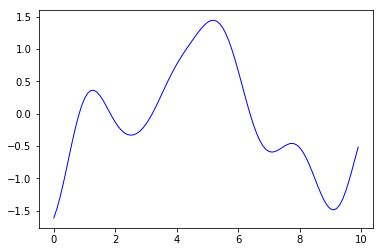

In [31]:
# Squared exponential

# The mean function of the GP
def mu ( x ):
    return 0

# The covariance function of the GP - this is an example of a "squared exponential" covariance function, see Sec.?
def k_SE ( x , y ):
    return np.exp ( -0.5 * (x-y) * (x-y) )

# The sampling points
x_star = np.arange ( 0 , 10 , 0.1 )

# The mean N-vector - formed from the mean function, mu
M = np.array ( [ mu(x) for x in x_star ] )

# The N by N covariance matrix - formed from the covariance function, k.
K = np.array( [ [ k_SE(x,y) for x in x_star ] for y in x_star ] )

# A random realisation of the function values - drawn from the multivariate Gaussian distribution ~ N(M,K)
f_star = np.random.multivariate_normal ( M , K )

# Plot a realisation of the GP
plt.plot ( x_star , f_star , linewidth=1 , color='b' )
plt.show ( )


$\textbf{Exercise:}$ The above cell generates random realisations of a squared exponential covariance function. Try modifying the covariance function to $k_{\textrm{SE}}(x,x')=\sigma_{f}^{2}\exp\left(\frac{-1}{2}\frac{(x-x')^{2}}{\ell^{2}}\right)$ and experiment with different choices of $\sigma_{f}$ and $\ell$. Explore how the these two "hyperparameters" (see Sec.3) control the properties of the GP. (You can also experiment with using a non-zero mean function, $\mu(x)$.) Also try experimenting with using $k_{\textrm{?}}(x,x')=\exp\left(\frac{-1}{2}(x-x')^{3}\right)$. Why doesn't this work?


Notice that the examples $2.3.1$ and $2.3.1$ had a prefered value on the x axis at $x=0$. The squared-exponential does not have any such prefered point, in fact it is translation invariant; $k(x,x')=k(x+\Delta,x'+\Delta)$. A covariance function with this property, $k(x,x')=k(x-x')$, is called "stationary".

Notice also that in the example 2.3.3 we have choosen to stop drawing the curve with points and instead use a smooth line. Of course, whenever any practical computation on GPs is performed it is always with a finite number of points, so a list plot is more honest. However, the sampling of the points $\mathbf{x}_{*}$ is arbitrary and in the example $2.3.3$ the choice was designed to show the smooth behaviour of the underlying GP, so perhaps the line plot is more appropriate.


# 3 The Covariance Function

In section 2 we saw that a GP can be specified by a symmetric positive definite covariance function, $k(x,x')$. We also saw through several examples that this covariance function governs the properties of the GP. In this section we will introduce several covariance functions which are commonly used for regression in a more systematic way and also explore more formally how the covariance function governs the "smoothness" of the GP.

# 3.1 Some Commonly Used Covariance functions

ZOHEYR, Maybe show SE, Matern, exponential and possibily Wendland polynomials?

ZOHEYR, Maybe we also talk about how to use existing covariance functions to build new one.

# 3.2 Mean Square Continuity and Differentiability

CHRIS, I will write some notes on the smoothness properties of covariance functions here. I will use the Matern and Squared exponential as examples.


# 4 Using Gaussian Processes for Regression

# 4.1 A Simple Regression Example in 1D

# 4.2 A 2D Regression Example

# 5 Gaussian Process Regression: A More Sophisticated Gravitational Wave Example

I HAVE STARTED GATHERING THE NUMERICAL RELATIVITY DATA FOR THIS EXAMPLE, AND SOME PRELIMINARY CODE IS IN THE NOTEBOOK ./dev/SXS.ipynb.

# 6 Conclusions